In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
imgpath = "/content/drive/MyDrive/brain/brain_tumor_dataset/yes/Y1.jpg";

In [ ]:
img = cv2.imread(imgpath,1)

In [ ]:
img.shape

(218, 180, 3)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
orig_img = img
orig_img.shape

(218, 180, 3)

In [ ]:
row, columns, channels = orig_img.shape

In [ ]:
orig_img = img
orig_img.shape

(218, 180, 3)

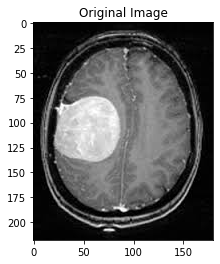

In [ ]:
plt.imshow(orig_img)
plt.title("Original Image")
plt.show()

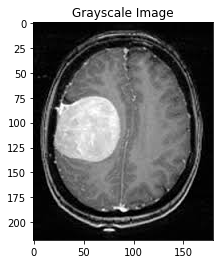

In [ ]:
# Color Conversion
gray_img = cv2.cvtColor( orig_img, cv2.COLOR_BGR2GRAY )
plt.imshow(gray_img,cmap='gray')
plt.title("Grayscale Image")
plt.show()

In [ ]:
type(gray_img)

numpy.ndarray

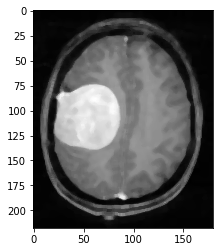

In [ ]:
# Salt & Pepper Noise
median_filtered = cv2.medianBlur(gray_img, 5)
plt.imshow(median_filtered,cmap='gray')
plt.show()

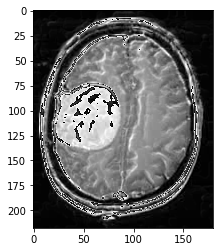

In [ ]:
# Edge Detection using : 3*3 Sobel Filters
Gx= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
#print ("Gx \n", Gx)
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
#print ("Gy \n", Gy)
img_sobelx = cv2.Sobel(median_filtered,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(median_filtered,cv2.CV_8U,0,1,ksize=3)

img_sobel = img_sobelx + img_sobely + gray_img
plt.imshow(img_sobel,cmap='gray')
plt.show()

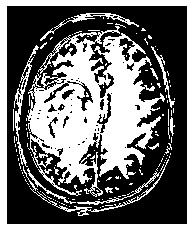

In [ ]:
# Set threshold and maxValue
threshold = 127
maxValue = 255

# Threshold the pixel values
th, thresh = cv2.threshold(img_sobel, threshold, maxValue, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.axis('off')
plt.show()

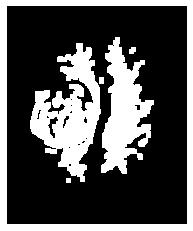

In [ ]:
# Morphological operation to remove any small white noises
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

plt.imshow(opening,cmap='gray')
plt.axis('off')
plt.show()

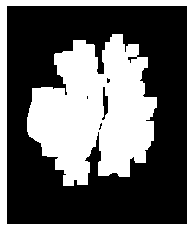

In [ ]:
# Black region : sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.imshow(sure_bg,cmap='gray')
plt.axis('off')
plt.show()

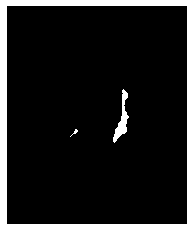

In [ ]:
#  White region : sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sure_fg,cmap='gray')
plt.axis('off')
plt.show()

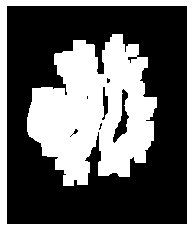

In [ ]:
# Identifying regions where we don't know whether foreground and background using Watershed algorithm
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(unknown,cmap='gray')
plt.axis('off')
plt.show()

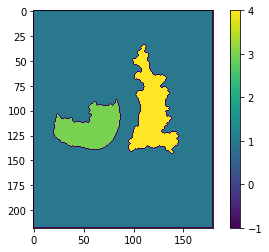

In [ ]:
contours, _ = cv2.findContours(sure_fg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Creating a numpy array for markers and converting the image to 32 bit using dtype paramter
marker = np.zeros((gray_img.shape[0], gray_img.shape[1]),dtype = np.int32)

marker = np.int32(sure_fg) + np.int32(sure_bg)

# Marker Labelling
for id in range(len(contours)):
    cv2.drawContours(marker,contours,id,id+2, -1)

marker = marker + 1

marker[unknown==255] = 0

copy_img = orig_img.copy()

cv2.watershed(copy_img, marker)

imgplt = plt.imshow(marker)
plt.colorbar()
plt.show()

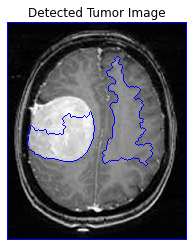

In [ ]:
copy_img[marker==-1]=(0,0,255)
cv2.imwrite('sample\\output\\tumor_img.jpg',copy_img)
plt.imshow(copy_img,cmap='gray')
plt.axis('off')
plt.title('Detected Tumor Image')
plt.show()